<a href="https://colab.research.google.com/github/aayush97/GoogleColabPetProjects/blob/master/K_Nearest_Neighbours.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import heapq
from sklearn import datasets
from sklearn.cross_validation import train_test_split
import csv
import matplotlib.pyplot as plt
import math

C:\Users\Aayush\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [0]:
class KNearestNeighbours:
    def __init__(self,k,training_data,classes):
        self.k = k
        self.data = training_data
        self.classes = classes
        
    def predict(self,test):
        h = []
        for i in range(len(self.data)):
            dist = 0
            for j in range(len(test)):
                dist += (test[j]-self.data[i][j])**2 # Euclidean Distance
            h.append((dist,self.classes[i]))
        heapq.heapify(h)
        h=heapq.nsmallest(self.k,h)

        arr = [0 for i in range(len(self.classes))]
        for (a,b) in h:
            arr[b]+=1
        return arr.index(max(arr))
        

In [0]:
def accuracyTest(X,Y,k, test):
    x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=test, random_state=42)
    knn = KNearestNeighbours(k,x_train,y_train)
    c=0
    for i in range(len(x_test)):
        res = knn.predict(x_test[i])
        if(y_test[i]==res):
            c+=1
    return c/len(x_test)

In [0]:
 def visualize(X,Y):   
    fig = plt.figure(figsize=(12,6))
    train_size = [.05,.1,.2,.4]
    neighbours = [[(2*i+1) for i in range(10)] for j in range (len(train_size))]
    result = [[] for i in range(len(train_size))]
    for i in range(len(train_size)):
        for j in range(len(neighbours[i])):
            result[i].append(accuracyTest(X,Y,neighbours[i][j],1-train_size[i]))
    colors = ['red','blue','green','purple']
    for i in range(len(train_size)):
        print(result[i])
        plt.plot(neighbours[i], result[i], colors[i],label="") # plotting t, a separately
    plt.legend(('training size = 5%', 'training size = 10%', 'training size = 20%','training size = 40%'),
               loc='upper right')
    plt.xlabel("number of neighbours")
    plt.ylabel("accuracy")
    plt.show()

[0.99079754601227, 0.977760736196319, 0.9815950920245399, 0.973159509202454, 0.9631901840490797, 0.9608895705521472, 0.9524539877300614, 0.9455521472392638, 0.9378834355828221, 0.9432515337423313]
[0.9910931174089069, 0.9902834008097166, 0.982995951417004, 0.982995951417004, 0.97165991902834, 0.9708502024291498, 0.9595141700404858, 0.9587044534412955, 0.9611336032388664, 0.9595141700404858]
[0.9981785063752276, 0.9908925318761385, 0.9908925318761385, 0.9908925318761385, 0.9872495446265938, 0.9872495446265938, 0.9872495446265938, 0.9854280510018215, 0.9854280510018215, 0.9854280510018215]
[0.9987864077669902, 1.0, 1.0, 0.9963592233009708, 0.991504854368932, 0.991504854368932, 0.991504854368932, 0.991504854368932, 0.9902912621359223, 0.9878640776699029]


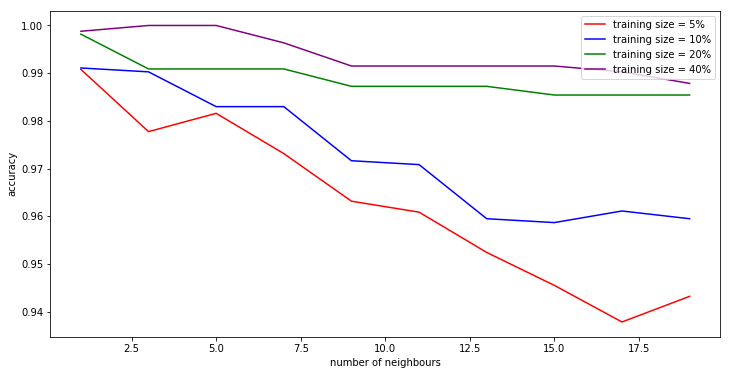

In [0]:
# UCI ML bank note authentication dataset
# https://archive.ics.uci.edu/ml/datasets/banknote+authentication

f = 'data_banknote_authentication.csv'
data = csv.reader(open(f))

li = []
for line in data:
    li.append(list(map(float,line)))
X,Y = zip(*[(s[:-1], int(s[-1])) for s in li])
visualize(X,Y)

[0.9230769230769231, 0.9300699300699301, 0.7412587412587412, 0.32867132867132864, 0.32867132867132864, 0.32867132867132864, 0.32867132867132864, 0.32867132867132864, 0.32867132867132864, 0.32867132867132864]
[0.9777777777777777, 0.9703703703703703, 0.6148148148148148, 0.6074074074074074, 0.5851851851851851, 0.562962962962963, 0.42962962962962964, 0.31851851851851853, 0.31851851851851853, 0.31851851851851853]
[0.975, 0.975, 0.9666666666666667, 0.9666666666666667, 0.9333333333333333, 0.9166666666666666, 0.9, 0.7833333333333333, 0.55, 0.5333333333333333]
[0.9777777777777777, 0.9555555555555556, 0.9444444444444444, 0.9666666666666667, 0.9444444444444444, 0.9666666666666667, 0.9777777777777777, 0.9555555555555556, 0.9444444444444444, 0.9666666666666667]


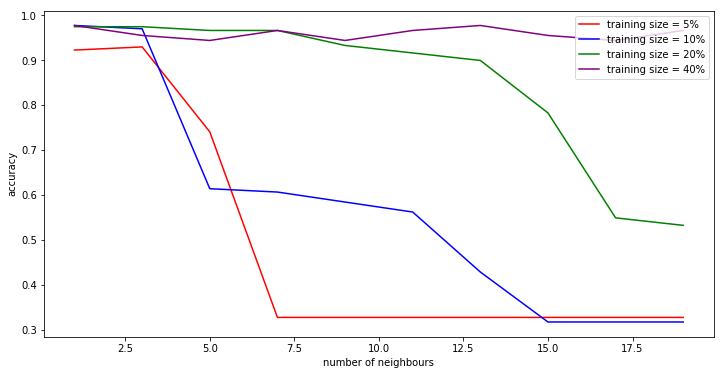

In [0]:
# iris dataset from sklearn

iris = datasets.load_iris()
X = iris.data
Y = iris.target
visualize(X,Y)